In [247]:
# ---------------------DEEP LEARNING MODEL TO PREDICT THE CHURN RATE AT  A BANK------------------
# TYPE : BINARY CLASSIFICATION PROBLEM
#Importing  the necessary libraries
# Importing pandas
import pandas as pd
# Importing numpy 
import numpy as np
# Importing matplotlib for plotting graphs
import matplotlib.pyplot as plt

# Importing tensorflow as tf
import tensorflow as tf
# importing keras from tensorflow
from tensorflow import keras
# Import confusion matrix & classification report in order to evaluate the model 
from sklearn.metrics import confusion_matrix , classification_report

# Import seaborn for graph plotting
import seaborn as sns

# DATASET  https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling



In [142]:
%matplotlib inline

In [143]:

data = pd.read_csv('Churn_Modelling.csv')

In [144]:
# generating  10 random  samples
data.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1893,1894,15802486,Hayes,488,France,Male,34,3,0.00,2,1,1,125979.36,0
7011,7012,15609356,Chimaraoke,697,France,Female,25,1,0.00,2,0,0,87803.32,0
3069,3070,15570932,Pirozzi,666,France,Male,43,7,137780.74,2,1,1,119100.05,1
434,435,15799384,Collier,683,France,Male,33,8,0.00,1,0,0,73564.44,0
7415,7416,15635598,Hsieh,812,France,Male,29,6,0.00,2,0,0,168023.60,0
21,22,15597945,Dellucci,636,Spain,Female,32,8,0.00,2,1,0,138555.46,0
9701,9702,15636912,Sneddon,678,Spain,Male,38,3,124483.53,1,1,0,126253.31,0
2465,2466,15612071,Wilson,763,Spain,Female,32,10,95153.77,1,0,1,81310.10,0
3012,3013,15739160,Mahon,849,France,Female,41,9,115465.28,1,1,0,103174.50,0
7098,7099,15642391,Lettiere,621,Germany,Male,51,4,109978.83,1,0,0,177740.58,1


In [145]:
# ------------------------DATA CLEANING -----------------------------------
# DROPPING COLUMNS OF NO USE
# USING ONE HOT ENCODING
# USING MINMAX SCALER


# Dropping Surname column as it is of no use
data.drop('Surname',axis='columns',inplace=True)

In [146]:
data

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [147]:
# Checking count of 'Geography column'
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [149]:
# Using one hot encoding for 'Geography' column

geography = pd.get_dummies(data['Geography'])
merged = pd.concat([data,geography],axis='columns')


In [150]:
# Dropping the previous 'geography' column & storing it in a variable 'final'
final = merged.drop(['Geography'], axis='columns')
final

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,619,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,608,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,502,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,699,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,850,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,516,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,709,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,772,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [181]:
# for gender
final['Gender'] = pd.get_dummies(final['Gender'])

In [182]:
final

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,15634602,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,9999,15682355,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [183]:
# Checking count of 'Tenure' column
final['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [198]:
New_final = final.drop('CustomerId',axis='columns')

In [199]:
# Checking count of NumOfProducts
New_final['NumOfProducts'].value_counts()

0.000000    5084
0.333333    4590
0.666667     266
1.000000      60
Name: NumOfProducts, dtype: int64

In [200]:
# Checking null values using isnull().sum()
New_final.isnull().sum()

RowNumber          0
CreditScore        0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
France             0
Germany            0
Spain              0
dtype: int64

In [201]:
# Using MinMaxScaler inOrder to Convert 'CreditScore','Age','Tenure','Balance',
# 'NumOfProducts','EstimatedSalary', into values in range 0 & 1
# cols_to_scale has all columns that need to be scaled
cols_to_scale = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
# Importing MinMax Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
New_final[cols_to_scale] = scaler.fit_transform(New_final[cols_to_scale])

In [202]:
New_final.head()

,RowNumber,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,1,0.538,1,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,1,0,0
1,2,0.516,1,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0,0,1
2,3,0.304,1,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1,0,0
3,4,0.698,1,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,1,0,0
4,5,1.000,1,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0,0,1


In [203]:
# Dropping RowNumber as it is of no Use
final2 = New_final.drop('RowNumber',axis='columns')

In [204]:
# Getting all the values in final2 columns
for col in final2:
    print(f'{col}: {final2[col].unique()}')
# -----------END OF DATA CLEANING PROCESS-----------------------------

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [205]:
# ---------------------- THIS IS DONE IN ORDER TO SOLVE THE PROBLEM OF CLASS IMBALANCE------------
# Using UNDERSAMPLING technique
# Class count
count_1, count_2 = final2.Exited.value_counts()



In [207]:
count_1

7963

In [162]:
count_2

2037

In [211]:
# Divide by class
count_1 = final2[final2['Exited'] == 0]
count_2 = final2[final2['Exited'] == 1]

In [212]:
# Class count
count_class_0, count_class_1 = final2.Exited.value_counts()

# Divide by class
df_class_0 = final2[final2['Exited'] == 0]
df_class_1 = final2[final2['Exited'] == 1]

In [213]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Exited.value_counts())

Random under-sampling:
0    2037
1    2037
Name: Exited, dtype: int64


In [214]:
# -----------------------SPLITTING THE DATA INTO X & Y & then training them -------------------------
#  TARGET VARIABLE WHICH IS 'EXITED' is dropped from X
X = df_test_under.drop('Exited',axis=1)

In [215]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain
248,0.568,0,0.081081,0.8,0.410915,0.000000,1,1,0.787904,0,1,0
2016,0.692,0,0.135135,0.4,0.688115,0.000000,1,1,0.582355,1,0,0
1753,0.490,1,0.067568,1.0,0.403059,0.333333,0,0,0.185174,0,0,1
7641,0.894,0,0.175676,0.9,0.000000,0.333333,1,1,0.123698,1,0,0
9836,0.474,0,0.283784,1.0,0.000000,0.333333,1,1,0.852071,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9981,0.296,0,0.324324,0.3,0.605982,0.000000,1,1,0.267193,0,1,0
9982,0.610,1,0.378378,0.7,0.546617,0.000000,1,0,0.575729,0,1,0
9991,0.494,1,0.472973,0.4,0.352259,0.000000,1,0,0.346899,1,0,0
9997,0.718,1,0.243243,0.7,0.000000,0.000000,0,1,0.210390,1,0,0


In [216]:
# the target variable 'Exited' is Stored in y
y = df_test_under['Exited']

In [217]:
y

248     0
2016    0
1753    0
7641    0
9836    0
       ..
9981    1
9982    1
9991    1
9997    1
9998    1
Name: Exited, Length: 4074, dtype: int64

In [219]:
# Importing train test split for train & splitting the data
from sklearn.model_selection import train_test_split

In [233]:
# The ratio used here is 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=15, stratify=y)

In [234]:
# to know X shape
X.shape

(4074, 12)

In [222]:
# getting y shape
y.shape

(4074,)

In [223]:
# This is done in order to confirm whether it is imbalance or not
y_train.value_counts()

1    1630
0    1629
Name: Exited, dtype: int64

In [236]:
# BUILDING A DEEP LEARNING MODEL
model = keras.Sequential([
#     first layer which has 12 input layer & activation is relu
        keras.layers.Dense(12, input_dim=12, activation='relu'),
#     First hidden layer
        keras.layers.Dense(15, activation='relu'),
#     Second hidden layer
        keras.layers.Dense(1, activation='sigmoid')
    ])

# since it is binary classification metrics is accuracy & loss is binary_crossentropy
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Fitting the model X_train & y_train & running for 100 times(100 epochs)
model.fit(X_train, y_train, epochs=100)    

    
 

Epoch 1/100
90/90 [==============================] - 0s 717us/step - loss: 0.6968 - accuracy: 0.4862
Epoch 2/100
90/90 [==============================] - 0s 706us/step - loss: 0.6530 - accuracy: 0.6261
Epoch 3/100
90/90 [==============================] - 0s 661us/step - loss: 0.6296 - accuracy: 0.6467
Epoch 4/100
90/90 [==============================] - 0s 723us/step - loss: 0.6303 - accuracy: 0.6399
Epoch 5/100
90/90 [==============================] - 0s 717us/step - loss: 0.6257 - accuracy: 0.6532
Epoch 6/100
90/90 [==============================] - 0s 773us/step - loss: 0.6116 - accuracy: 0.6659
Epoch 7/100
90/90 [==============================] - 0s 751us/step - loss: 0.6087 - accuracy: 0.6746
Epoch 8/100
90/90 [==============================] - 0s 740us/step - loss: 0.5951 - accuracy: 0.6946
Epoch 9/100
90/90 [==============================] - 0s 706us/step - loss: 0.5986 - accuracy: 0.6909
Epoch 10/100
90/90 [==============================] - 0s 762us/step - loss: 0.5805 - accura

90/90 [==============================] - 0s 605us/step - loss: 0.4633 - accuracy: 0.7712
Epoch 82/100
90/90 [==============================] - 0s 695us/step - loss: 0.4492 - accuracy: 0.7917
Epoch 83/100
90/90 [==============================] - 0s 762us/step - loss: 0.4625 - accuracy: 0.7646
Epoch 84/100
90/90 [==============================] - 0s 706us/step - loss: 0.4495 - accuracy: 0.7820
Epoch 85/100
90/90 [==============================] - 0s 717us/step - loss: 0.4426 - accuracy: 0.7851
Epoch 86/100
90/90 [==============================] - 0s 717us/step - loss: 0.4603 - accuracy: 0.7672
Epoch 87/100
90/90 [==============================] - 0s 728us/step - loss: 0.4396 - accuracy: 0.7924
Epoch 88/100
90/90 [==============================] - 0s 863us/step - loss: 0.4744 - accuracy: 0.7689
Epoch 89/100
90/90 [==============================] - 0s 742us/step - loss: 0.4652 - accuracy: 0.7697
Epoch 90/100
90/90 [==============================] - 0s 728us/step - loss: 0.4712 - accuracy: 

In [227]:
# --------------MODEL EVALUATION-------------------------------
# using classification reports which gives all the values

# storing the predicted value in y_preds

y_preds = model.predict(X_test)
# Rounding it  of
y_preds = np.round(y_preds)
    
# Printing the classification report for the same
print("Classification Report: \n", classification_report(y_test, y_preds))
    

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.77      0.76       408
           1       0.76      0.73      0.75       407

    accuracy                           0.75       815
   macro avg       0.75      0.75      0.75       815
weighted avg       0.75      0.75      0.75       815



In [228]:

print(model.evaluate(X_test, y_test))
#     Accuracy comes out to be 75.21 %

26/26 [==============================] - 0s 758us/step - loss: 0.4855 - accuracy: 0.7521
[0.4855172038078308, 0.7521472573280334]


In [243]:
# ----------Prediction on the test data------------------
yp = model.predict(X_test)
yp[:5]

array([[0.12433708],
       [0.80728316],
       [0.52700156],
       [0.93886054],
       [0.54102796]], dtype=float32)

In [244]:
# Simple program for if predicted value is greater than 0.5 then 1 else 0
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [245]:
# Checking for first 10  values  using the above program
y_pred[:10]

[0, 1, 1, 1, 1, 1, 1, 0, 1, 0]

Text(69.0, 0.5, 'Truth')

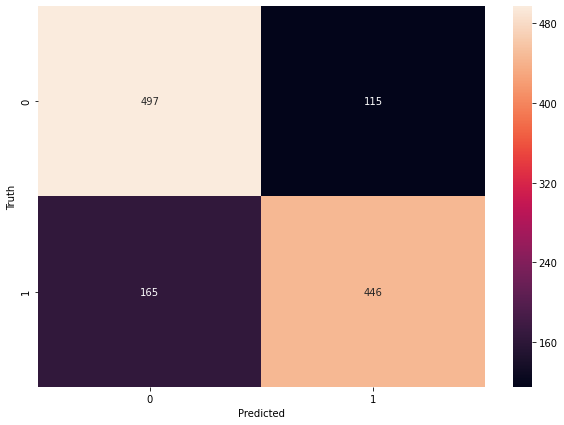

In [246]:
# PLOTTING THE CONFUSION MATRIX IN THE FORM OF FIGURE
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)
# MENTIONING THE FIGURESIZE
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
# X label (ie to be put in X axis) & it is the value which our model has predicted
plt.xlabel('Predicted')
# y label(ie it is put on y axis) & it is the truth value
plt.ylabel('Truth')